# Data Preprocessing in Python

It involves cleaning, transforming and organizing raw data to ensure it is accurate, consistent and ready for modeling.

Organized data supports better Exploratory Data Analysis (EDA), making patterns and trends more interpretable.



# Steps-by-Step implementation

## Step 1: Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt # Or import matplotlib.pyplot as plt


In [5]:
diabetesDf= pd.read_csv("datasets/diabetes.csv")
diabetesDf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Step 2: Inspect Data Structure and Check Missing Values

We understand dataset size, data types and identify any incomplete (missing) data that needs handling.

**df.info()**:
Prints concise summary including count of non-null entries and data type of each column.

In [6]:
diabetesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**df.isnull().sum()**: Returns the number of missing values per column.

In [7]:
diabetesDf.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Step 3: Statistical Summary and Visualizing Outliers

Get numeric summaries like mean, median, min/max and detect unusual points (outliers). Outliers can skew models if not handled.

**df.describe()**: Computes count, mean, std deviation, min/max and quartiles for numerical columns.

In [8]:
diabetesDf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Boxplots**: Visualize spread and detect outliers using matplotlib’s boxplot().

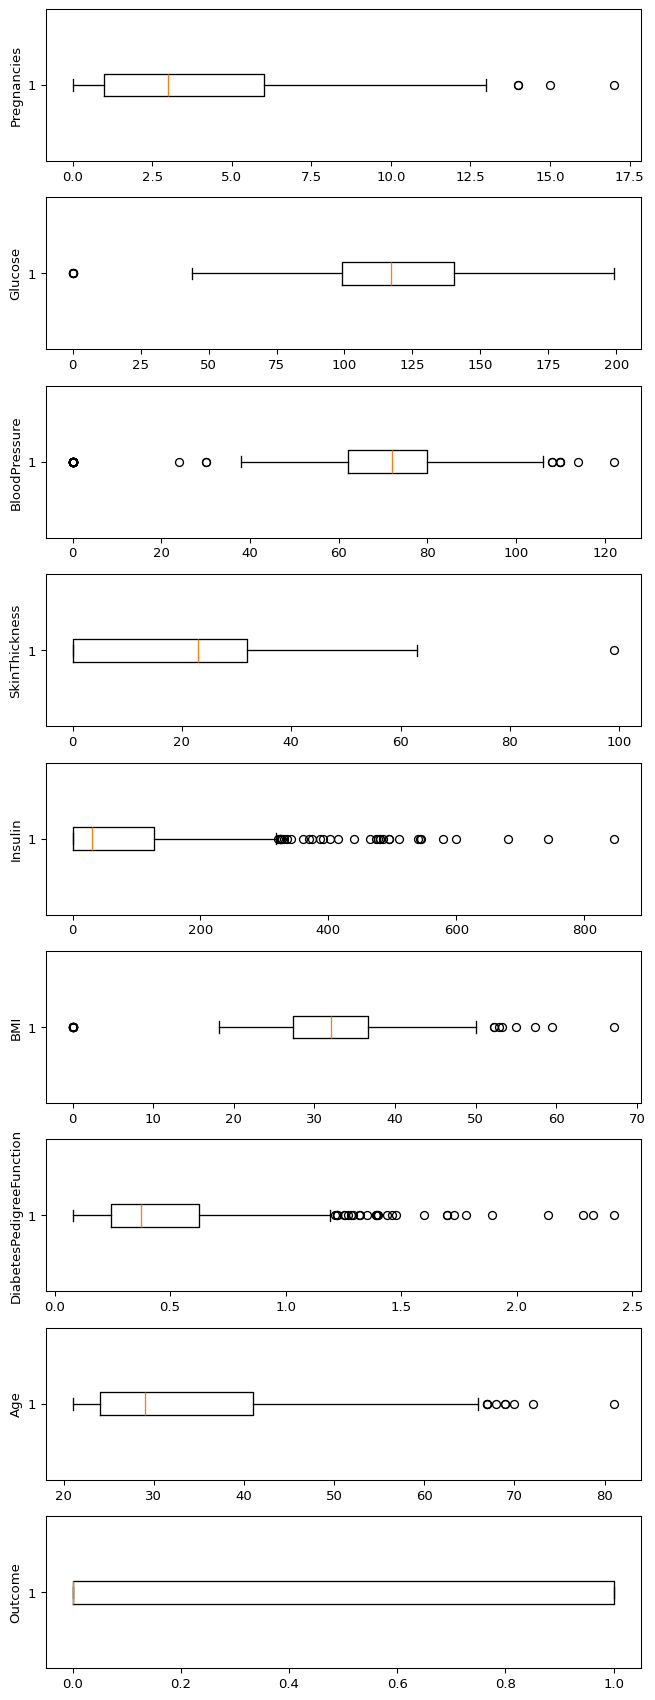

In [17]:
fig,axs=plt.subplots(len(diabetesDf.columns), 1, figsize=(7,18), dpi=95)

for i, column in enumerate(diabetesDf.columns):
    axs[i].boxplot(diabetesDf[column], vert=False)
    axs[i].set_ylabel(column)
plt.tight_layout()
plt.show()